<a href="https://colab.research.google.com/github/aso1901102/AI_tech2020/blob/master/2020AI0204_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###回帰分析で気象データを分析

ライブラリを読み込んで、気象データもGithubから読み込む

In [1]:
# ライブラリのimport
import urllib.request as req
#Pandasライブラリをpdという名前でimport
import pandas as pd

#ファイルをGithubからダウンロード
url = "https://raw.githubusercontent.com/masatokg/JapaneseMeteorologicalAgencySample/master/data_Fukoka.csv"

#保存ファイル名を指定
savefile = "kion20y.csv"
#URLからデータDLして、指定した保存ファイル名で保持
req.urlretrieve(url,savefile)
print("Colab環境に保存しました")

#ファイルデータを読み込んで表示
df = pd.read_csv(savefile,encoding="utf-8")
df.head()

Colab環境に保存しました


,年,月,日,気温,品質,均質
0,1998,1,1,7.9,8,1
1,1998,1,2,8.7,8,1
2,1998,1,3,9.7,8,1
3,1998,1,4,8.5,8,1
4,1998,1,5,6.3,8,1


### 過去の日付ごとの各年の気温をリストにまとめて平均気温を算出


In [2]:
#20年間の気温を日付毎に抜き出して各リストにまとめる
#日付の配列リストを保持するリスト（2次元配列リスト）をmdで定義
#空のリストを宣言
md = {}

#dfの各行を変数rowに代入しながらループ
for i, row in df.iterrows():
  # mに「月」,dに「日」,vに「気温」を代入
  m, d, v = (int(row["月"]), int(row["日"]), float(row["気温"]))
  # mとdの値を文字列結合して2次元配列リストの行をキーにする
  # 「m / d」の文字列が出来上がる
  key = str(m) + "/" + str(d)

  # mdの中に「m/d」などのキー名の行（配列リスト）がなければ新規に追加
  if not(key in md):
    md[key] = []

  # mdの街頭キー名の行に新しい配列要素としてのvを追加する
  md[key] += [v]
# ループ終了

# 出来上がった日付リストを表示（日付毎の各年の気温リスト）
print(md)

{'1/1': [7.9, 6.6, 9.6, 7.8, 7.8, 7.1, 9.9, 4.9, 6.8, 8.9, 4.3, 3.8, 3.5, 3.3, 7.9, 4.9, 10.5, 2.8, 7.3, 8.1, 6.4], '1/2': [8.7, 8.1, 12.1, 9.1, 3.1, 6.2, 9.3, 4.6, 8.1, 9.9, 5.8, 6.1, 6.6, 5.2, 6.1, 6.9, 8.1, 4.4, 11.6, 8.2, 5.6], '1/3': [9.7, 8.7, 10.3, 6.7, 4.6, 6.4, 8.8, 9.3, 7.3, 10.2, 6.5, 6.2, 7.0, 4.5, 6.7, 2.7, 8.4, 4.4, 11.6, 9.0, 7.6], '1/4': [8.5, 8.4, 8.9, 5.4, 10.3, 2.6, 8.2, 8.1, 4.4, 9.3, 7.0, 7.5, 6.9, 4.3, 4.4, 2.8, 9.5, 8.6, 11.0, 9.8, 6.2], '1/5': [6.3, 8.4, 10.9, 4.7, 9.5, 1.3, 8.2, 6.2, 3.5, 8.9, 8.1, 7.9, 4.9, 5.8, 4.8, 4.2, 8.6, 9.7, 9.9, 9.4, 6.2], '1/6': [8.2, 10.2, 13.9, 5.9, 6.3, 1.9, 8.8, 6.9, 3.1, 6.7, 8.3, 8.5, 4.3, 4.0, 5.0, 4.5, 8.3, 12.3, 9.5, 9.2, 7.5], '1/7': [7.0, 7.5, 7.0, 9.0, 7.8, 3.4, 9.4, 8.5, 2.7, 6.9, 11.0, 8.6, 3.9, 3.6, 6.2, 5.9, 8.7, 7.2, 9.1, 8.0, 7.4], '1/8': [10.1, 3.7, 7.2, 11.1, 4.7, 4.7, 8.2, 6.2, 2.9, 7.5, 9.8, 8.7, 4.5, 4.6, 7.7, 8.2, 8.4, 6.1, 7.5, 11.1, 10.9], '1/9': [9.3, 3.1, 7.0, 10.1, 6.2, 5.9, 6.9, 4.2, 4.2, 6.4, 9.3, 7.9, 6

In [3]:
# 日付毎に各年の気温を合計し、年数で割って平均を求める
# 平均気温用のリスト変数を宣言
avg = {}

# ループしてmdからkeyを取り出す
for key in md:
  # mdのキー行の合計を、mdの行数（年数）で割った値を平均値としてリストに追加
  avg[key] = sum(md[key]) / len(md[key])
  # key(年)に対応する値を表示
  #print("{0}の平均気温：{1}".format(key,v))
#ループ終了

#試しに日付を指定して表示
print("1/3の平均気温は{0}".format(avg["1/3"]))

1/3の平均気温は7.457142857142857


###ループ計算の代わりにpandasのgroupbyを使って集計する

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)


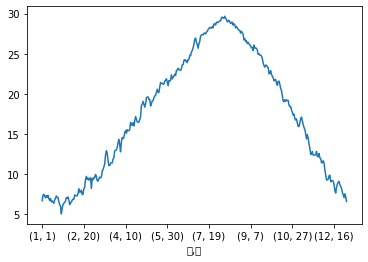

In [4]:
#　pandasのgroupbyメソッドで指定したキー単位のグループを作る
g = df.groupby(['月','日'])["気温"]
# 各グループごとに月・日毎の気温の値を集計してグループの要素数で割る
gg = g.sum()/g.count()
#　グラフ表示のためのmatplotlibライブラリをimport
import matplotlib.pyplot as plt
# プロット用データを生成
gg.plot()
# 画像として保存
plt.savefig("tenki-heikin-tuki.png")
# プロットデータを表示
plt.show()

### Pandasで気温が30℃を超えた日をフィルタリングしてみる

In [5]:
#データの先頭を表示して確認
df.head()

,年,月,日,気温,品質,均質
0,1998,1,1,7.9,8,1
1,1998,1,2,8.7,8,1
2,1998,1,3,9.7,8,1
3,1998,1,4,8.5,8,1
4,1998,1,5,6.3,8,1


         年  月   日    気温  品質  均質
184   1998  7   4  30.3   8   1
188   1998  7   8  30.3   8   1
189   1998  7   9  30.2   8   1
213   1998  8   2  30.8   8   1
214   1998  8   3  30.2   8   1
...    ... ..  ..   ...  ..  ..
7537  2018  8  21  32.0   8   1
7538  2018  8  22  32.8   8   1
7539  2018  8  23  31.2   8   1
7540  2018  8  24  30.6   8   1
7542  2018  8  26  30.7   8   1

[272 rows x 6 columns]
年
1998    15
1999     3
2000     9
2001    12
2002     6
2004    17
2005     8
2006    14
2007    11
2008    13
2009     7
2010    27
2011     9
2012    15
2013    37
2014     3
2015     4
2016    20
2017    19
2018    23
Name: 年, dtype: int64


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)


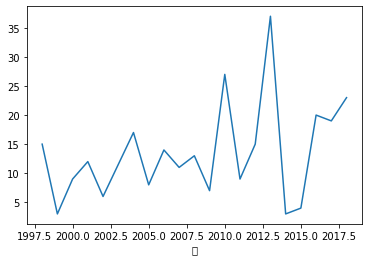

In [10]:
# 「気温列の値が30より大きい」という条件でフィルタリング
# 条件式を変数化(atui_bool)
atui_bool = (df["気温"] > 30)
# 作成した条件でデータをフィルタリング
atui = df[atui_bool]
print(atui)

#　年列の値でグループ化してカウントを表示（例：1990年は3日）
cnt = atui.groupby(["年"])["年"].count()
print(cnt)

# cntをグラフ化 
cnt.plot()
plt.savefig("tenki-over30.png")
plt.show()

### 回帰分析で翌日の気温を推論する

データを説明変数（ｘ）と目的変数（ｙ）に分離


In [15]:
#データの学習用とテスト用に分ける条件変数を定義
#学習用
train_year = (df["年"] <=  2017)
#テスト用
test_year = (df["年"] >= 2018)
#何日分のでデータから予測を立てるか変数にする
#過去６日分のデータから当該日の気温を予測
interval = 6

#引数のデータから説明変数と目的変数を分離する関数を定義
def make_data(data):
  #説明変数のリストを宣言
  x = []
  #目的変数のリストを宣言
  y = []
  #引数で渡されたDataFrameから「気温」列の値のリストを抽出
  temps = list(data["気温"])

  #ループしながら６個前のデータ（説明変数）と該当データ（目的変数）に分離する
  #初日から年の最終日までループする
  for i in range(len(temps)):
    #　iが6未満（当該日の過去データが6日分ない）時はスルーして次へ
    if i in range(len(temps)):
    # 7日目以降の温度をyに入れる（目的変数）
      y.append(temps[i])
      #当該日6日分の気温を入れるリスト
      xa =[]
    #ループさせて6日分のをリストxaに追加
    for p in range(interval):
      #dは該当日の6～1日前のindex値になる
      d = i + p - interval
      xa.append(temps[d])
    #できたxaをxに追加
    x.append(xa)
  return (x,y)
#関数make_data()終了 

#学習用データを抽出してmake_data()に引き渡しx,yに分離
train_x,train_y = make_data(df[train_year])
#検証用データを抽出してmake_data()に引き渡しx,yに分離
test_x,test_y = make_data(df[test_year])

作成したデータの線形回帰分析

In [17]:
#線形回帰のimport
from sklearn.linear_model import LinearRegression
#線形回帰のアルゴリズムを生成
Lr = LinearRegression(normalize = True)
#モデルの学習
#説明変数と目的変数を引き渡す
Lr.fit(train_x,train_y)
#
pre_y = Lr.predict(test_x)

結果の表示

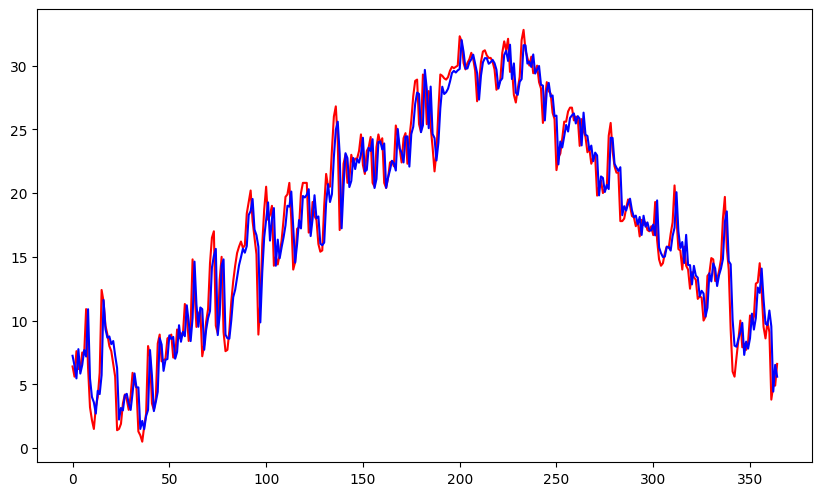

In [18]:
plt.figure(figsize=(10,6),dpi=100)
plt.plot(test_y,c='r')
plt.plot(pre_y,c='b')
plt.savefig('tenki-kion-Lr.png')
plt.show()